In [2]:
import pickle as pkl
import wave
import numpy as np
import matplotlib.pyplot as plt
import pyaudio

## convert bytes to wave file

In [5]:
f_data = open('../data/result_data.txt', 'rb')
lines = f_data.readlines()

CHANNELS = 1
RATE = 16000
FORMAT = pyaudio.paInt16
audio = pyaudio.PyAudio()
waveFile = wave.open('../data/sound.wav', 'wb')
waveFile.setnchannels(CHANNELS)
waveFile.setsampwidth(audio.get_sample_size(FORMAT))
waveFile.setframerate(RATE)
waveFile.writeframes(b''.join(lines))
waveFile.close()

f_data.close()

## extract sound data from wave file

In [3]:
f_sound = wave.open('../sound.wav', 'rb')
frames = f_sound.readframes(-1)
data = np.frombuffer(frames, dtype='int16')
f_sound.close()

-622

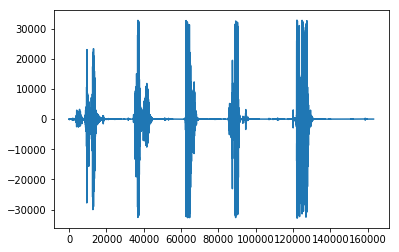

In [4]:
import matplotlib.pyplot as plt
plt.plot(data)
plt.show()

## read response result

In [12]:
from google.cloud import speech
from google.cloud.speech import enums
from google.cloud.speech import types

In [35]:
def convert_sec(timestamp):
    sec = int(timestamp.seconds)
    nanos = int(timestamp.nanos)
    
    result = sec + nanos / (10**9)
    
    return result

In [87]:
f_temp = open('../data/result_temp.pkl', 'rb')
temp = pkl.load(f_temp)

# extract timeline
timelines = []
pairs = []
previous_word = ''
for res in temp:
    if res.stability >= 0.8 or res.is_final is True:
        word = res.alternatives[0].transcript
        if len(word) <= len(previous_word):
            previous_word = word
            continue
        sec = convert_sec(res.result_end_time)
        timeline = sec * 16000
        timelines.append(timeline)
        if res.is_final is True:
            pair = (timeline, word, float(res.alternatives[0].confidence))
        else:
            pair = (timeline, word, res.stability)
        pairs.append(pair)
        previous_word = word

f_temp.close()

In [88]:
for pair in pairs:
    print(pair)

(25920.0, '사과', 0.8999999761581421)
(51840.0, '사과 오렌지', 0.8999999761581421)
(103680.0, '사과 오렌지 수박', 0.8999999761581421)
(136800.0, '사과 오렌지 수박 바나나', 0.9236595034599304)


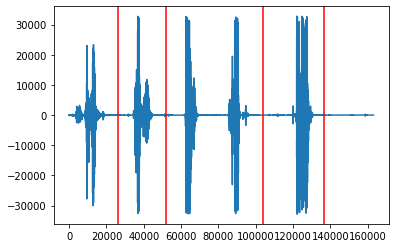

In [89]:
plt.plot(data)
for t in timelines:
    plt.axvline(x=t, color='r')
plt.show()